In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') # to mount the drive data into colab cloud and enter the activation code

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/ML nishit sir/Logistic regression"

/content/drive/My Drive/ML nishit sir/Logistic regression


In [5]:
columnname=['x','y','z']
dataset = pd.read_csv('ex2data1.txt',names=columnname)
print(dataset)
print(dataset.shape)

            x          y  z
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
..        ...        ... ..
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1

[100 rows x 3 columns]
(100, 3)


In [6]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

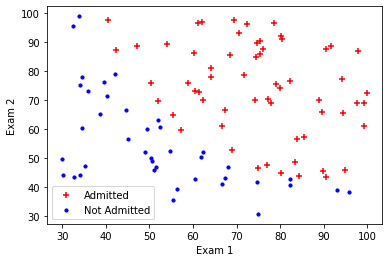

In [7]:
pos , neg = (y==1).reshape(len(y),1) , (y==0).reshape(len(y),1)
plt.scatter(x[pos[:,0],0],x[pos[:,0],1],c="r",marker="+")
plt.scatter(x[neg[:,0],0],x[neg[:,0],1],marker="o",c='b',s=10)
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend(["Admitted","Not Admitted"],loc=0)

In [8]:
def sigmoid(z): # we used for differenciate from linear regression to logistic regression
    #Return  Sigmoid of Z
    return (1/(1+np.exp(-z)))

In [9]:
def featureNormalization(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x_norm=(x-mean)/std
    return x_norm,mean,std

In [10]:
def costfunction(theta,x,y):
    # return cost and grad
    m=len(y)
    predictions= []
    error=0
    
    for i in range(m):
        predictions.append(sigmoid(np.dot(x[i],theta)))
        error+=((-y[i])*np.log(predictions[i])-(1-y[i])*np.log(1-predictions[i]))
    
    cost = (1/m)*error

    grad = (1/m) *np.dot(x.transpose(),(predictions-y))
    return cost,grad

In [11]:
def gradientDescent(theta,x,y,alpha,iter_num):
    # update theta in each iteration
    # return theta cost values of each iteration
    m=len(y) 
    cost_function_values =[]
    
    for i in range(iter_num):
        cost, grad = costfunction(theta,x,y)
        theta = theta - (alpha * grad)
        cost_function_values.append(cost)
        if(i%50==0):
            plt.scatter(x[pos[:,0],1],x[pos[:,0],2],c="r",marker="+",label="Admitted")
            plt.scatter(x[neg[:,0],1],x[neg[:,0],2],c="b",marker="x",label="Not admitted")
            x_value= np.array([np.min(x[:,1]),np.max(x[:,1])])
            y_value=-(theta[0] +theta[1]*x_value)/theta[2]
            plt.plot(x_value,y_value, "g")
            plt.xlabel("Exam 1 score")
            plt.ylabel("Exam 2 score")
            plt.show()
            
    
    return theta,cost_function_values

In [12]:
m , n = x.shape[0], x.shape[1]
x, x_mean, x_std = featureNormalization(x)
x= np.append(np.ones((m,1)),x,axis=1)      #axis=1 is direction along column and axis 0 is direction along row
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))

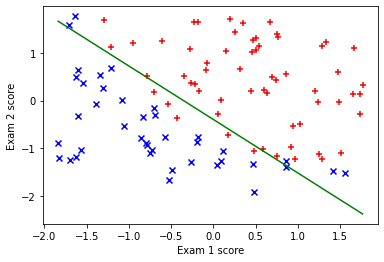

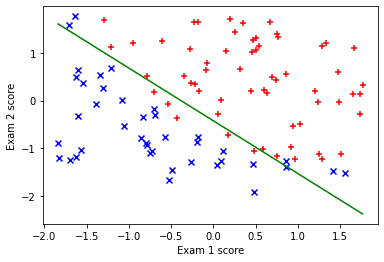

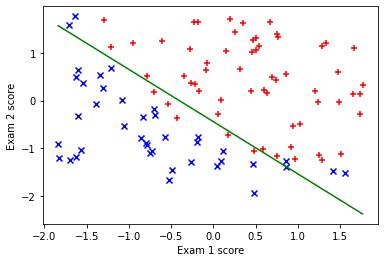

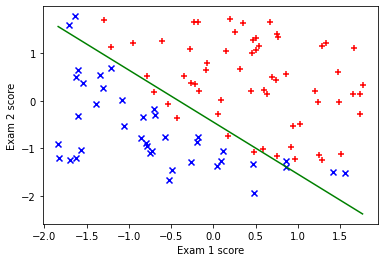

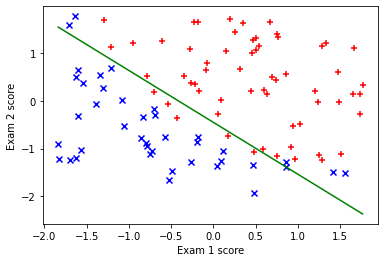

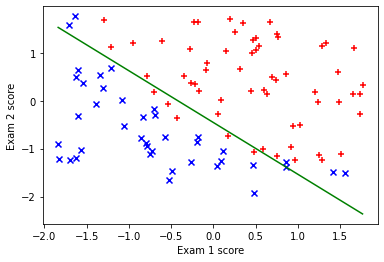

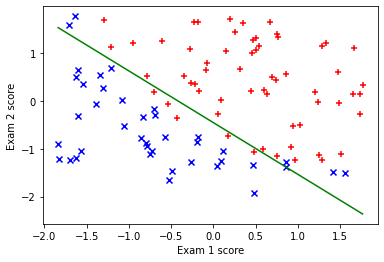

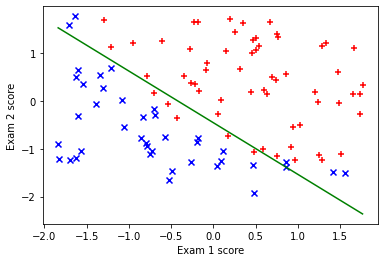

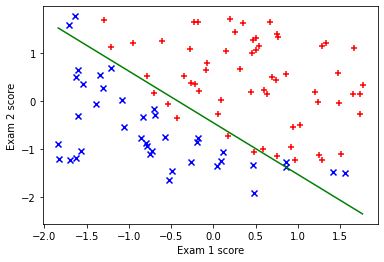

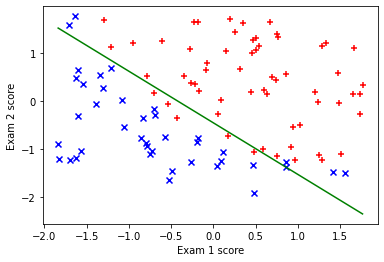

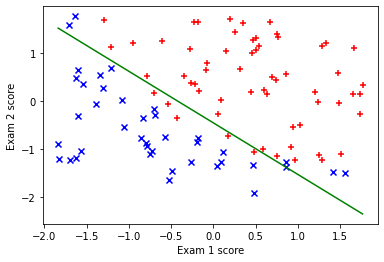

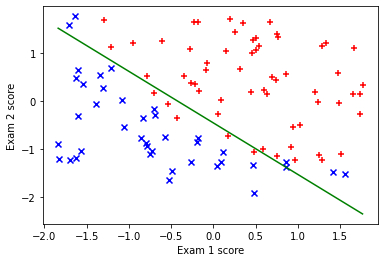

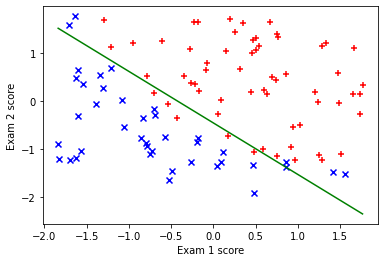

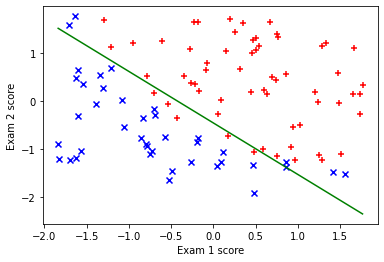

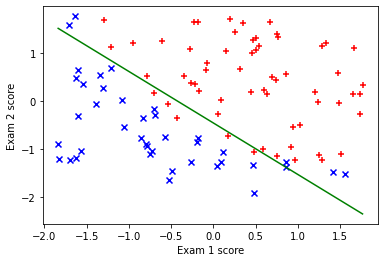

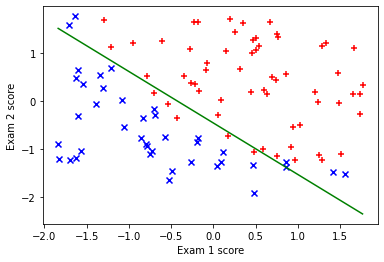

In [13]:
theta,cost_function_values=gradientDescent(initial_theta,x,y,0.5,800)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

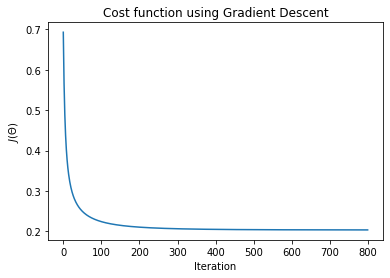

In [14]:
plt.plot(cost_function_values)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")